# Durstewitz Reproduction

In [2]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(context='poster', style='whitegrid')

import neuron

import time

neuron.h.load_file('./NEURON/durstewitz/durstewitz.hoc')
neuron.h.load_file('stdrun.hoc')

	1 


1.0

## Run one cell at a time

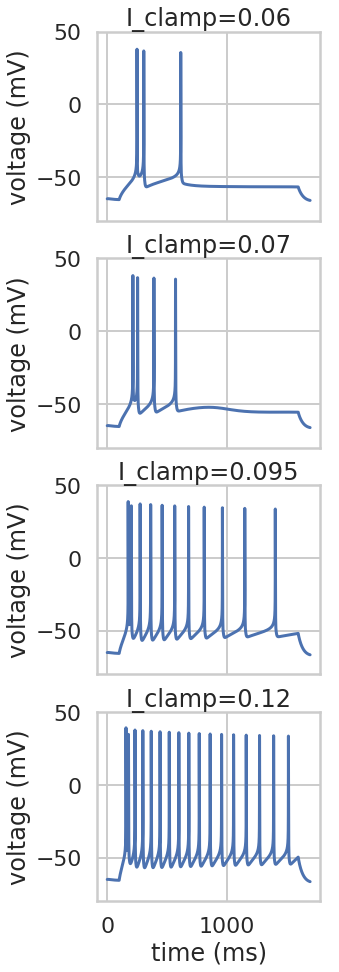

In [2]:
cell = neuron.h.Durstewitz()

times = []
volts = []
spikes = []
somatic_currents = np.array([0.060, 0.070, 0.095, 0.120])
for amp in somatic_currents:
    cell.init()

    v_rec = neuron.h.Vector()
    t_rec = neuron.h.Vector()
    spk_vec = neuron.h.Vector()
    v_rec.record(cell.soma(0.5)._ref_v)
    t_rec.record(neuron.h._ref_t)
    spk_rec = neuron.h.APCount(cell.soma(0.5))
    spk_rec.record(neuron.h.ref(spk_vec))

    stim = neuron.h.IClamp(cell.soma(0))
    stim.delay = 100  # ms
    stim.dur = 1500  # ms
    stim.amp = amp  # namp
    
    neuron.h.tstop = 1700
    neuron.h.run()
    
    times.append(np.array(t_rec))
    volts.append(np.array(v_rec))
    spikes.append(np.array(spk_vec))
    
fig, axes = plt.subplots(4, 1, figsize=(4, 16), sharex=True, sharey=True)
for i in range(len(somatic_currents)):
    axes[i].plot(times[i], volts[i])
    axes[i].set(ylabel='voltage (mV)', ylim=((-80, 50)), title='I_clamp=%s' %somatic_currents[i])
axes[-1].set(xlabel='time (ms)')
plt.show()

## Run all cells together

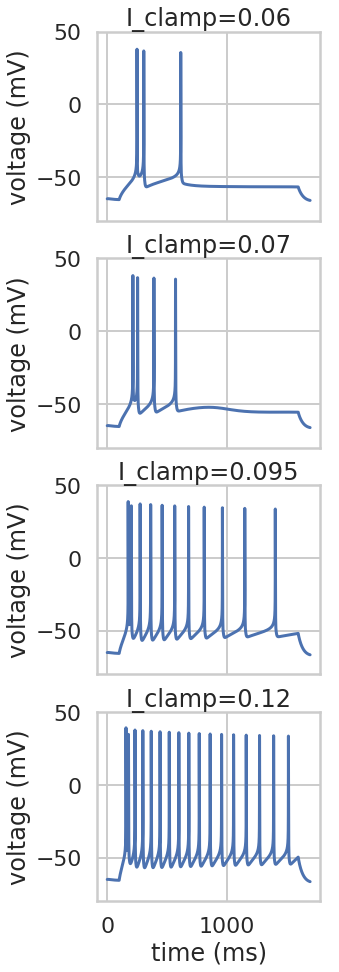

In [19]:
v_recs = []
t_recs = []
spk_recs = []
spk_vecs = []
cells = []
stims = []
somatic_currents = np.array([0.060, 0.070, 0.095, 0.120])

for amp in somatic_currents:
    cells.append(neuron.h.Durstewitz())
    cells[-1].init()

    v_recs.append(neuron.h.Vector())
    t_recs.append(neuron.h.Vector())
    spk_vecs.append(neuron.h.Vector())
    v_recs[-1].record(cells[-1].soma(0.5)._ref_v)
    t_recs[-1].record(neuron.h._ref_t)
    
    spk_recs.append(neuron.h.APCount(cells[-1].soma(0.5)))
    spk_recs[-1].record(neuron.h.ref(spk_vecs[-1]))

    stims.append(neuron.h.IClamp(cells[-1].soma(0)))
    stims[-1].delay = 100  # ms
    stims[-1].dur = 1500  # ms
    stims[-1].amp = amp  # namp
    
neuron.h.tstop = 1700
neuron.h.run()

times = []
volts = []
spikes = []
for n in range(len(somatic_currents)):
    times.append(np.array(t_recs[n]))
    volts.append(np.array(v_recs[n]))
    spikes.append(np.array(spk_vecs[n]))
    
fig, axes = plt.subplots(4, 1, figsize=(4, 16), sharex=True, sharey=True)
for i in range(len(somatic_currents)):
    axes[i].plot(times[i], volts[i])
    axes[i].set(ylabel='voltage (mV)', ylim=((-80, 50)), title='I_clamp=%s' %somatic_currents[i])
axes[-1].set(xlabel='time (ms)')
plt.show()

In [20]:
print(spikes[2].shape[0])

11


## Run with Dopamine perturbation

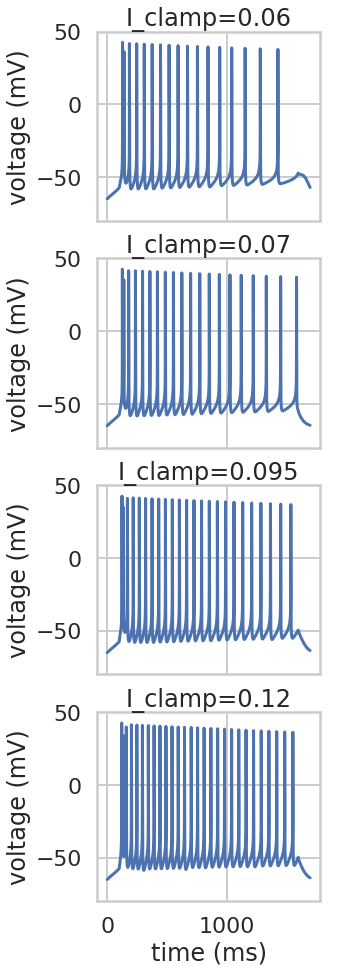

In [21]:
v_recs = []
t_recs = []
spk_recs = []
spk_vecs = []
cells = []
stims = []
somatic_currents = np.array([0.060, 0.070, 0.095, 0.120])

for amp in somatic_currents:
    cells.append(neuron.h.Durstewitz())
    cells[-1].init_DA()

    v_recs.append(neuron.h.Vector())
    t_recs.append(neuron.h.Vector())
    spk_vecs.append(neuron.h.Vector())
    v_recs[-1].record(cells[-1].soma(0.5)._ref_v)
    t_recs[-1].record(neuron.h._ref_t)
    
    spk_recs.append(neuron.h.APCount(cells[-1].soma(0.5)))
    spk_recs[-1].record(neuron.h.ref(spk_vecs[-1]))

    stims.append(neuron.h.IClamp(cells[-1].soma(0)))
    stims[-1].delay = 100  # ms
    stims[-1].dur = 1500  # ms
    stims[-1].amp = amp  # namp
    
neuron.h.tstop = 1700
neuron.h.run()

times = []
volts = []
spikes = []
for n in range(len(somatic_currents)):
    times.append(np.array(t_recs[n]))
    volts.append(np.array(v_recs[n]))
    spikes.append(np.array(spk_vecs[n]))
    
fig, axes = plt.subplots(4, 1, figsize=(4, 16), sharex=True, sharey=True)
for i in range(len(somatic_currents)):
    axes[i].plot(times[i], volts[i])
    axes[i].set(ylabel='voltage (mV)', ylim=((-80, 50)), title='I_clamp=%s' %somatic_currents[i])
axes[-1].set(xlabel='time (ms)')
plt.show()

In [22]:
print(spikes[2].shape[0])

24


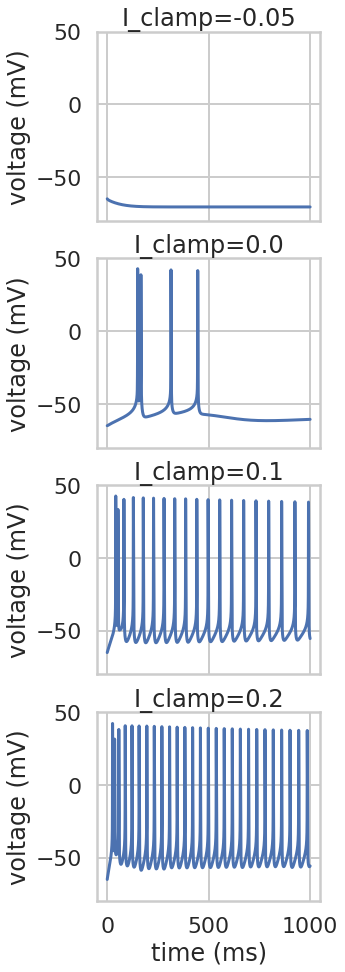

In [18]:
t_final = 1000
v_recs = []
t_recs = []
spk_recs = []
spk_vecs = []
cells = []
stims = []
somatic_currents = np.array([-0.05, 0.0, 0.1, 0.2])

for amp in somatic_currents:
    cells.append(neuron.h.Durstewitz())
    cells[-1].init_DA()

    v_recs.append(neuron.h.Vector())
    t_recs.append(neuron.h.Vector())
    spk_vecs.append(neuron.h.Vector())
    v_recs[-1].record(cells[-1].soma(0.5)._ref_v)
    t_recs[-1].record(neuron.h._ref_t)
    
    spk_recs.append(neuron.h.APCount(cells[-1].soma(0.5)))
    spk_recs[-1].record(neuron.h.ref(spk_vecs[-1]))

    stims.append(neuron.h.IClamp(cells[-1].soma(0)))
    stims[-1].delay = 0  # ms
    stims[-1].dur = t_final  # ms
    stims[-1].amp = amp  # namp
    
neuron.h.tstop = t_final
neuron.h.run()

times = []
volts = []
spikes = []
for n in range(len(somatic_currents)):
    times.append(np.array(t_recs[n]))
    volts.append(np.array(v_recs[n]))
    spikes.append(np.array(spk_vecs[n]))
    
fig, axes = plt.subplots(4, 1, figsize=(4, 16), sharex=True, sharey=True)
for i in range(len(somatic_currents)):
    axes[i].plot(times[i], volts[i])
    axes[i].set(ylabel='voltage (mV)', ylim=((-80, 50)), title='I_clamp=%s' %somatic_currents[i])
axes[-1].set(xlabel='time (ms)')
plt.show()

# Runtime Tests

In [8]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(context='poster', style='whitegrid')

import neuron

import time

neuron.h.load_file('./NEURON/durstewitz/durstewitz.hoc')
neuron.h.load_file('stdrun.hoc')

1.0

In [7]:
t_final = 0.1 * 1000  # ms

## neuron.h.run() continuously to t_final

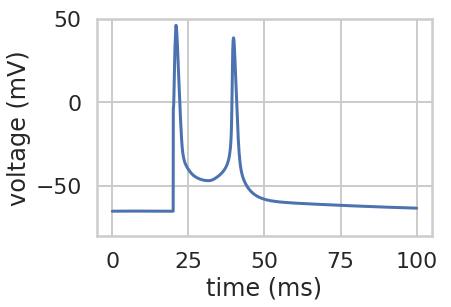

continuous: 0.15970087051391602


In [10]:
cell = neuron.h.Durstewitz()
cell.init()
v_rec = neuron.h.Vector()
t_rec = neuron.h.Vector()
spk_vec = neuron.h.Vector()
v_rec.record(cell.soma(0.5)._ref_v)
t_rec.record(neuron.h._ref_t)
spk_rec = neuron.h.APCount(cell.soma(0.5))
spk_rec.record(neuron.h.ref(spk_vec))
stim = neuron.h.NetStim()
syn = neuron.h.ExpSyn(cell.soma(0.5))
syn.tau = 0.1
nc = neuron.h.NetCon(stim, syn, 0, 0, 1e1)
nc.pre().start = 20
nc.pre().number = 1
nc.pre().interval = 0
nc.pre().noise = 0

s1 = time.time()
neuron.h.tstop = t_final
neuron.h.run()
e1 = time.time()

times = np.array(t_rec)
volts = np.array(v_rec)
spikes = np.array(spk_vec)

fig, axes = plt.subplots(1, 1)
axes.plot(times, volts)
axes.set(ylabel='voltage (mV)', ylim=((-80, 50)))
axes.set(xlabel='time (ms)')
plt.show()

print('continuous: %s' %(e1-s1))

## neuron.h.run() broken up by dt

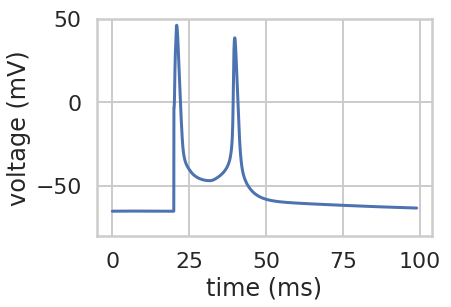

broken by dt with run(): 5.963719606399536


In [11]:
cell = neuron.h.Durstewitz()
cell.init()
v_rec = neuron.h.Vector()
t_rec = neuron.h.Vector()
spk_vec = neuron.h.Vector()
v_rec.record(cell.soma(0.5)._ref_v)
t_rec.record(neuron.h._ref_t)
spk_rec = neuron.h.APCount(cell.soma(0.5))
spk_rec.record(neuron.h.ref(spk_vec))
stim = neuron.h.NetStim()
syn = neuron.h.ExpSyn(cell.soma(0.5))
syn.tau = 0.1
nc = neuron.h.NetCon(stim, syn, 0, 0, 1e1)
nc.pre().start = 20
nc.pre().number = 1
nc.pre().interval = 0
nc.pre().noise = 0

s2 = time.time()
for t in np.arange(0, t_final, 1):
    neuron.h.tstop = t
    neuron.h.run()
e2 = time.time()

times = np.array(t_rec)
volts = np.array(v_rec)
spikes = np.array(spk_vec)

fig, axes = plt.subplots(1, 1)
axes.plot(times, volts)
axes.set(ylabel='voltage (mV)', ylim=((-80, 50)))
axes.set(xlabel='time (ms)')
plt.show()

print('broken by dt with run(): %s' %(e2-s2))

## neuron.h.continuerun() broken up by dt

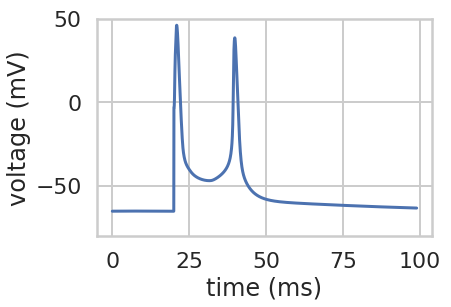

broken by dt with continuerun(): 2.017249584197998


In [10]:
cell = neuron.h.Durstewitz()
cell.init()
v_rec = neuron.h.Vector()
t_rec = neuron.h.Vector()
spk_vec = neuron.h.Vector()
v_rec.record(cell.soma(0.5)._ref_v)
t_rec.record(neuron.h._ref_t)
spk_rec = neuron.h.APCount(cell.soma(0.5))
spk_rec.record(neuron.h.ref(spk_vec))

# neuron.h.init()

stim = neuron.h.NetStim()
syn = neuron.h.ExpSyn(cell.soma(0.5))
syn.tau = 0.1
nc = neuron.h.NetCon(stim, syn, 0, 0, 1e1)
nc.event(200)
nc.pre().start = 20
nc.pre().number = 1
nc.pre().interval = 0
nc.pre().noise = 0

s3 = time.time()
neuron.h.init()
for t in np.arange(0, t_final, 1):
    neuron.h.tstop = t
#     neuron.h.init()
    neuron.h.continuerun(neuron.h.tstop)
e3 = time.time()

times = np.array(t_rec)
volts = np.array(v_rec)
spikes = np.array(spk_vec)

fig, axes = plt.subplots(1, 1)
axes.plot(times, volts)
axes.set(ylabel='voltage (mV)', ylim=((-80, 50)))
axes.set(xlabel='time (ms)')
plt.show()

print('broken by dt with continuerun(): %s' %(e3-s3))

## Runtime results

In [13]:
print('continuous: %s' %(e1-s1))
print('broken by dt with run(): %s' %(e2-s2))
print('broken by dt with continuerun(): %s' %(e3-s3))

continuous: 0.15970087051391602
broken by dt with run(): 5.963719606399536
broken by dt with continuerun(): 0.12258148193359375


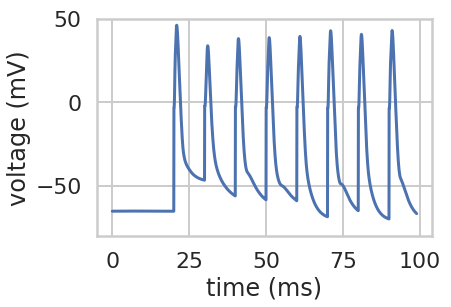

broken by dt with continuerun(): 0.16120529174804688


In [14]:
t_final = 0.1 * 1000

cell = neuron.h.Durstewitz()
cell.init()
v_rec = neuron.h.Vector()
t_rec = neuron.h.Vector()
spk_vec = neuron.h.Vector()
v_rec.record(cell.soma(0.5)._ref_v)
t_rec.record(neuron.h._ref_t)
spk_rec = neuron.h.APCount(cell.soma(0.5))
spk_rec.record(neuron.h.ref(spk_vec))

# neuron.h.init()

stim = neuron.h.NetStim()
syn = neuron.h.ExpSyn(cell.soma(0.5))
syn.tau = 0.1
nc = neuron.h.NetCon(stim, syn, 0, 0, 1e1)

nc.pre().start = 20
nc.pre().number = 10
nc.pre().interval = 10
nc.pre().noise = 0

neuron.h.init()

s3 = time.time()
for t in np.arange(0, t_final, 1):
    neuron.h.tstop = t
#     neuron.h.init()
    neuron.h.continuerun(neuron.h.tstop)
e3 = time.time()

times = np.array(t_rec)
volts = np.array(v_rec)
spikes = np.array(spk_vec)

fig, axes = plt.subplots(1, 1)
axes.plot(times, volts)
axes.set(ylabel='voltage (mV)', ylim=((-80, 50)))
axes.set(xlabel='time (ms)')
plt.show()

print('broken by dt with continuerun(): %s' %(e3-s3))

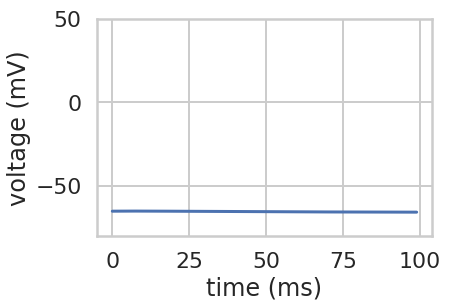

broken by dt with continuerun(): 0.1309351921081543


In [15]:
t_final = 0.1 * 1000

cell = neuron.h.Durstewitz()
cell.init()
v_rec = neuron.h.Vector()
t_rec = neuron.h.Vector()
spk_vec = neuron.h.Vector()
v_rec.record(cell.soma(0.5)._ref_v)
t_rec.record(neuron.h._ref_t)
spk_rec = neuron.h.APCount(cell.soma(0.5))
spk_rec.record(neuron.h.ref(spk_vec))

# neuron.h.init()

stim = neuron.h.NetStim()
stim.start = 0
stim.number = 0
stim.interval = 0
stim.noise = 0
syn = neuron.h.ExpSyn(cell.soma(0.5))
syn.tau = 0.1
nc = neuron.h.NetCon(stim, syn, 0, 0, 1e1)

netcons = np.zeros((1), dtype=list)
netcons[0] = []
netcons[0].append(nc)

# nc.event(20)
neuron.h.init()
# nc.event(20)
stim.start = 10
stim.number = 10
stim.interval = 10
stim.noise = 0

s3 = time.time()
for t in np.arange(0, t_final, 1):
    neuron.h.tstop = t
#     neuron.h.init()
    neuron.h.continuerun(neuron.h.tstop)
e3 = time.time()

times = np.array(t_rec)
volts = np.array(v_rec)
spikes = np.array(spk_vec)

fig, axes = plt.subplots(1, 1)
axes.plot(times, volts)
axes.set(ylabel='voltage (mV)', ylim=((-80, 50)))
axes.set(xlabel='time (ms)')
plt.show()

print('broken by dt with continuerun(): %s' %(e3-s3))

In [16]:
## Adaptation to constant input current

In [2]:
# how big of an effect does DA have?

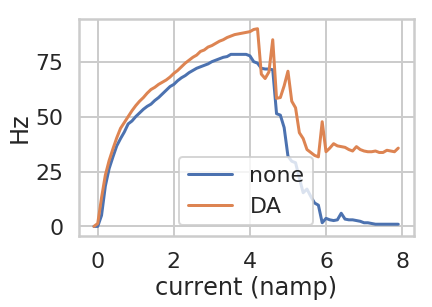

In [2]:
somatic_currents = np.arange(-0.1, 8.0, 0.1)
t_final = 3000
spk_recs = []
spk_vecs = []
cells = []
stims = []

for amp in somatic_currents:
    cells.append(neuron.h.Durstewitz())
    cells[-1].init()
    spk_vecs.append(neuron.h.Vector())    
    spk_recs.append(neuron.h.APCount(cells[-1].soma(0.5)))
    spk_recs[-1].record(neuron.h.ref(spk_vecs[-1]))
    stims.append(neuron.h.IClamp(cells[-1].prox(0)))
    stims.append(neuron.h.IClamp(cells[-1].dist(0)))
    stims.append(neuron.h.IClamp(cells[-1].basal(0)))
    stims[-1].delay = 0  # ms
    stims[-1].dur = t_final  # ms
    stims[-1].amp = amp  # namp
    
neuron.h.tstop = t_final
neuron.h.run()

spikes_normal = []
for n in range(len(somatic_currents)):
    spikes_normal.append(len(np.array(spk_vecs[n])))

spk_recs = []
spk_vecs = []
cells = []
stims = []

for amp in somatic_currents:
    cells.append(neuron.h.Durstewitz())
    cells[-1].init_DA()
    spk_vecs.append(neuron.h.Vector())    
    spk_recs.append(neuron.h.APCount(cells[-1].soma(0.5)))
    spk_recs[-1].record(neuron.h.ref(spk_vecs[-1]))
    stims.append(neuron.h.IClamp(cells[-1].prox(0)))
    stims.append(neuron.h.IClamp(cells[-1].dist(0)))
    stims.append(neuron.h.IClamp(cells[-1].basal(0)))
    stims[-1].delay = 0  # ms
    stims[-1].dur = t_final  # ms
    stims[-1].amp = amp  # namp
    
neuron.h.tstop = t_final
neuron.h.run()

spikes_DA = []
for n in range(len(somatic_currents)):
    spikes_DA.append(len(np.array(spk_vecs[n])))

fig, ax = plt.subplots()
ax.plot(somatic_currents, np.array(spikes_normal)/t_final*1000, label='none')
ax.plot(somatic_currents, np.array(spikes_DA)/t_final*1000, label='DA')
ax.set(xlabel='current (namp)', ylabel='Hz')
ax.legend()
plt.show()

In [3]:
np.array(spikes_normal)

array([  0,   0,  15,  55,  79,  95, 110, 120, 129, 140, 144, 150, 155,
       160, 164, 167, 172, 176, 181, 186, 191, 194, 199, 203, 206, 210,
       213, 216, 218, 220, 222, 225, 227, 229, 231, 232, 235, 235, 235,
       235, 235, 233, 225, 223, 216, 215, 215, 214, 154, 152, 135,  96,
        89,  87,  66,  46,  51,  41,  32,  29,   5,  11,   9,   8,   9,
        18,  10,   9,   9,   8,   7,   5,   5,   4,   3,   3,   3,   3,
         3,   3,   3])

In [30]:
np.array(spikes_normal)

array([  0,   0,  15,  55,  79,  95, 110, 120, 129, 140, 144, 150, 155,
       160, 164, 167, 172, 176, 181, 186, 191, 194, 199, 203, 206, 210,
       213, 216, 218, 220, 222, 225, 227, 229, 231, 232, 235, 235, 235,
       235, 235, 233, 225, 223, 216, 215, 215, 214, 154, 152, 135,  96,
        89,  87,  66,  46,  51,  41,  32,  29,   5,  11,   9,   8,   9,
        18,  10,   9,   9,   8,   7,   5,   5,   4,   3,   3,   3,   3,
         3,   3,   3])

In [31]:
np.array(spikes_DA)

array([  0,   4,  39,  70,  90, 106, 121, 134, 142, 150, 158, 165, 171,
       176, 182, 187, 190, 194, 197, 200, 204, 209, 213, 218, 223, 227,
       231, 234, 239, 241, 245, 247, 250, 253, 255, 258, 260, 262, 263,
       264, 265, 266, 269, 270, 208, 202, 211, 255, 175, 176, 192, 212,
       171, 162, 128, 120, 105, 101,  97,  95, 143, 102, 107, 113, 110,
       109, 108, 105, 103, 109, 105, 103, 102, 102, 103, 101, 101, 104,
       103, 102, 107])

In [4]:
np.array(spikes_DA)

array([  0,   4,  39,  70,  90, 106, 121, 134, 142, 150, 158, 165, 171,
       176, 182, 187, 190, 194, 197, 200, 204, 209, 213, 218, 223, 227,
       231, 234, 239, 241, 245, 247, 250, 253, 255, 258, 260, 262, 263,
       264, 265, 266, 269, 270, 208, 202, 211, 255, 175, 176, 192, 212,
       171, 162, 128, 120, 105, 101,  97,  95, 143, 102, 107, 113, 110,
       109, 108, 105, 103, 109, 105, 103, 102, 102, 103, 101, 101, 104,
       103, 102, 107])

In [13]:
t_final = 1000
n_cells = 5
amp = 0.1
spk_recs = []
spk_vecs = []
cells = []
stims = []
spk_recs2 = []
spk_vecs2 = []
cells2 = []
stims2 = []
    
for c in range(n_cells):
    cells.append(neuron.h.Durstewitz())
    cells[-1].init()
    spk_vecs.append(neuron.h.Vector())    
    spk_recs.append(neuron.h.APCount(cells[-1].soma(0.5)))
    spk_recs[-1].record(neuron.h.ref(spk_vecs[-1]))
    stims.append(neuron.h.IClamp(cells[-1].prox(0)))
    stims[-1].delay = 0  # ms
    stims[-1].dur = t_final  # ms
    stims[-1].amp = c*amp  # namp
    
for c in range(n_cells):
    cells2.append(neuron.h.Durstewitz())
    cells2[-1].init()
    spk_vecs2.append(neuron.h.Vector())    
    spk_recs2.append(neuron.h.APCount(cells2[-1].soma(0.5)))
    spk_recs2[-1].record(neuron.h.ref(spk_vecs2[-1]))
    stims2.append(neuron.h.IClamp(cells2[-1].prox(0)))
    stims2[-1].delay = 0  # ms
    stims2[-1].dur = t_final  # ms
    stims2[-1].amp = c*amp  # namp
    
neuron.h.init()
    
neuron.h.tstop = t_final
neuron.h.run()

for c in range(n_cells):
    print(len(np.array(spk_vecs[c])))
    print(len(np.array(spk_vecs2[c])))

0
0
10
10
21
21
28
28
33
33


In [14]:
t_final = 1000
n_cells = 5
amp = 0.1
spk_recs = []
spk_vecs = []
cells = []
stims = []
spk_recs2 = []
spk_vecs2 = []
cells2 = []
stims2 = []
    
for c in range(n_cells):
    cells.append(neuron.h.Durstewitz())
    cells[-1].init()
    spk_vecs.append(neuron.h.Vector())    
    spk_recs.append(neuron.h.APCount(cells[-1].soma(0.5)))
    spk_recs[-1].record(neuron.h.ref(spk_vecs[-1]))
    stims.append(neuron.h.IClamp(cells[-1].prox(0)))
    stims[-1].delay = 0  # ms
    stims[-1].dur = t_final  # ms
    stims[-1].amp = c*amp  # namp
    
for c in range(n_cells):
    cells2.append(neuron.h.Durstewitz())
    cells2[-1].init()
    spk_vecs2.append(neuron.h.Vector())    
    spk_recs2.append(neuron.h.APCount(cells2[-1].soma(0.5)))
    spk_recs2[-1].record(neuron.h.ref(spk_vecs2[-1]))
    stims2.append(neuron.h.IClamp(cells2[-1].prox(0)))
    stims2[-1].delay = 0  # ms
    stims2[-1].dur = t_final  # ms
    stims2[-1].amp = c*amp  # namp
    
neuron.h.init()
    
neuron.h.tstop = t_final
neuron.h.run()

for c in range(n_cells):
    print(len(np.array(spk_vecs[c])))
    print(len(np.array(spk_vecs2[c])))

0
0
10
10
21
21
28
28
33
33
